In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l2_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.9259259259259259, Loss: 0.3909862306382921
Checkpoint 200, Accuracy: 0.9259259259259259, Loss: 0.3793248777036314
Checkpoint 300, Accuracy: 0.9197530864197531, Loss: 0.3727602782072844
Checkpoint 400, Accuracy: 0.9259259259259259, Loss: 0.37333417821813514
Checkpoint 500, Accuracy: 0.9197530864197531, Loss: 0.3747020650793005


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.33120537 0.6543382  0.01445639]
[0. 0. 1.] <-> [0.30389068 0.03517346 0.6609358 ]
[1. 0. 0.] <-> [0.78940594 0.12587026 0.08472379]
[1. 0. 0.] <-> [0.7811142  0.16681413 0.05207171]
[1. 0. 0.] <-> [0.8099903  0.10754248 0.08246724]
[1. 0. 0.] <-> [0.77744085 0.07584056 0.14671855]
[1. 0. 0.] <-> [0.7573913  0.07767964 0.16492917]
[0. 1. 0.] <-> [0.64528835 0.32023725 0.03447442]
[1. 0. 0.] <-> [0.8619222  0.05583588 0.08224192]
[0. 0. 1.] <-> [0.3095337  0.03264037 0.65782595]
[1. 0. 0.] <-> [0.7584148  0.13110438 0.11048081]
[1. 0. 0.] <-> [0.8151963  0.08451534 0.10028826]
[1. 0. 0.] <-> [0.80981964 0.11510236 0.07507797]
[1. 0. 0.] <-> [0.86568964 0.05076252 0.08354784]
[1. 0. 0.] <-> [0.829465   0.10183999 0.06869507]
[1. 0. 0.] <-> [0.7237078  0.1891036  0.08718859]
[1. 0. 0.] <-> [0.83249    0.11024221 0.05726779]
[1. 0. 0.] <-> [0.70768213 0.16037709 0.13194077]
[1. 0. 0.] <-> [0.7561115  0.05987641 0.18401214]
[1. 0. 0.] <-> [0.83689517 0.08372905 0.07937574]


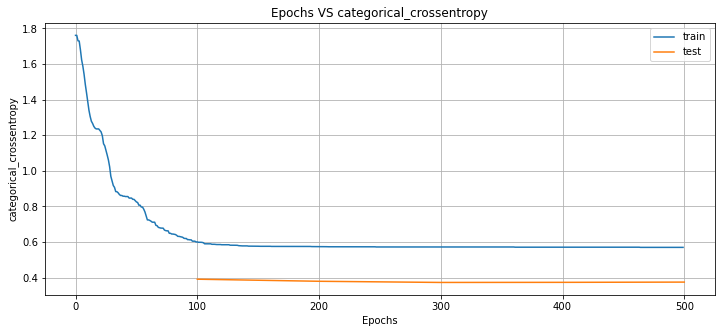

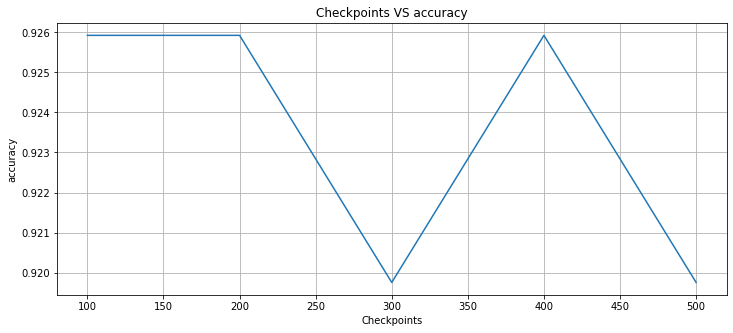

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9259259259259259, 'mean_square_error': 0.1998716104314658, 'categorical_crossentropy': 0.3909862306382921, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 20, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 8}, 2: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 4}}, 'checkpoint': 100} 


{'accuracy': 0.9259259259259259, 'mean_square_error': 0.19911683035369684, 'categorical_crossentropy': 0.3793248777036314, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 20, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 5}}, 'checkpoint': 200} 


{'accuracy': 0.9197530864197531, 'mean_square_error': 0.19320627580990285, 'categorical_crossentropy': 0.3727602782072844, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 13, 'tn_hit': 19, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 93, 'f

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-0.515908    0.68808067  0.21773595 -0.6028792  -0.5517585 ]
 bias: 0.601645290851593

Neuron 1: weights:
[ 0.44503662 -1.1140667  -0.6099746  -0.07752223  0.23167545]
 bias: 0.39371439814567566

Neuron 2: weights:
[-0.41995123  0.7818461   0.44548228 -0.2675992  -0.5421033 ]
 bias: -0.0995098277926445

Neuron 3: weights:
[-0.14097711 -0.63083386 -0.79444826 -0.9089484  -0.6448914 ]
 bias: 0.17244282364845276

$
Layer 2
Neuron 0: weights:
[0.7596563  0.61418563 0.02750615 1.1628525 ]
 bias: -0.3672247529029846

Neuron 1: weights:
[ 0.71214676 -1.8793414   1.118388   -0.9466217 ]
 bias: 0.018635336309671402

Neuron 2: weights:
[-1.5053406   1.0621268  -0.93833745 -0.43458906]
 bias: 0.13351982831954956

$

